<center><h1>Accuracy of NBA Draft Picks</h1></center>
<center><h2>Benjamin Kim</h2></center>

<h3>What are NBA Draft Picks?</h3>

<body>Each year, the NBA holds a draft in which 60 players can be drafted. The majority of these draft picks come from colleges, but there are exceptions, such as international players or even high school players. The 30 NBA teams have the ability to choose whichever player is available. However, choosing the right player isn't always guaranteed. Within every draft, there is bound to be a bust and a steal. A bust is a player who was drafted early but turned out to perform poorly, whereas a steal is a lower-ranked player who excels in the NBA. </body>

<h3>Data Information</h3>

This dataset that I imported contains both the total statistics and averages from the 2019 NBA draft. For the majority of this data analysis project, however, I am using the average statistics to help analyze how the players are performing compared to the average NBA player. The 2019 draft is known for having some extremely talented players, such as Zion Williamson, Ja Morant, and Darius Garland. Despite this, the majority of the draft class consists of players who have been benched or even cut. There were several NaN and unnecessary columns, which I navigated around and modified. However, I was able to comprehend all the data I used and make effective use of it.

<h3>Importing Libraries and Dataset</h3>

I utilized pandas and NumPy for data cleaning and analysis. I also employed matplotlib.pyplot to plot the data, facilitating the desired visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

I imported the dataset here.

In [2]:
df = pd.read_csv('datasets/2019NBA.csv')

In [3]:
df.head(10)

,Rk,Pk,Tm,Player,College,Yrs,G,MP,PTS,TRB,...,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,WS,WS/48,BPM,VORP
0,1,1,NOP,Zion Williamson,Duke,4.0,155.0,4894.0,3847.0,1015.0,...,0.346,0.688,31.6,24.8,6.5,3.9,18.4,0.181,4.8,8.4
1,2,2,MEM,Ja Morant,Murray State,5.0,257.0,8282.0,5783.0,1243.0,...,0.318,0.755,32.2,22.5,4.8,7.4,20.5,0.119,2.8,10.1
2,3,3,NYK,RJ Barrett,Duke,5.0,312.0,10387.0,5693.0,1685.0,...,0.344,0.716,33.3,18.2,5.4,2.8,10.4,0.048,-2.3,-0.6
3,4,4,LAL,De'Andre Hunter,Virginia,5.0,234.0,7200.0,3267.0,964.0,...,0.361,0.809,30.8,14.0,4.1,1.5,6.5,0.043,-3.3,-2.4
4,5,5,CLE,Darius Garland,Vanderbilt,5.0,275.0,9295.0,5102.0,711.0,...,0.383,0.869,33.8,18.6,2.6,6.6,15.0,0.077,-0.2,4.1
5,6,6,PHO,Jarrett Culver,Texas Tech,4.0,144.0,2480.0,934.0,402.0,...,0.276,0.509,17.2,6.5,2.8,1.2,-0.1,-0.001,-4.5,-1.6
6,7,7,CHI,Coby White,UNC,5.0,320.0,9078.0,4378.0,1147.0,...,0.373,0.844,28.4,13.7,3.6,3.6,12.5,0.066,-1.6,0.9
7,8,8,ATL,Jaxson Hayes,Texas,5.0,282.0,4488.0,1950.0,1045.0,...,0.275,0.713,15.9,6.9,3.7,0.7,15.0,0.160,-0.3,1.9
8,9,9,WAS,Rui Hachimura,Gonzaga,5.0,248.0,6530.0,3049.0,1189.0,...,0.355,0.767,26.3,12.3,4.8,1.3,8.7,0.064,-2.5,-0.9
9,10,10,ATL,Cam Reddish,Duke,5.0,208.0,5118.0,2020.0,597.0,...,0.324,0.837,24.6,9.7,2.9,1.3,2.6,0.024,-3.1,-1.5


<h3>Cleaning the Dataset</h3>

There are several columns which I feel that are unnecesary in this dataset for this project. This includes the college they went to, their VORP, and other things. The data will not be useful in the analysis.

In the code below I am dropping these columns due to it not being useful. 

In [4]:
df = df.drop(columns = ['Rk','Pk', 'Tm','College','Yrs','WS/48','BPM','VORP'])

In the code below, I am changing the name of some of the columns to make it easier to remember and type. This will make it easier for me in the future if I want to pull data from these columns. I am also filling in the NaN with 0 since they are the same thing in this dataset. I am also dropping pick 55 and 59 since they did not play any games. The minimum amount of games that need to be played to contribute to this project is 5.

In [5]:
df = df.rename(columns={'MP.1':'MPG', 'PTS.1':'PPG','TRB.1':'RPG','AST.1':'APG'})
df = df.fillna(0)
df = df.drop(index=55) 
df = df.drop(index=59) 
df

,Player,G,MP,PTS,TRB,AST,FG%,3P%,FT%,MPG,PPG,RPG,APG,WS
0,Zion Williamson,155.0,4894.0,3847.0,1015.0,605.0,0.600,0.346,0.688,31.6,24.8,6.5,3.9,18.4
1,Ja Morant,257.0,8282.0,5783.0,1243.0,1903.0,0.472,0.318,0.755,32.2,22.5,4.8,7.4,20.5
2,RJ Barrett,312.0,10387.0,5693.0,1685.0,886.0,0.429,0.344,0.716,33.3,18.2,5.4,2.8,10.4
3,De'Andre Hunter,234.0,7200.0,3267.0,964.0,356.0,0.447,0.361,0.809,30.8,14.0,4.1,1.5,6.5
4,Darius Garland,275.0,9295.0,5102.0,711.0,1820.0,0.450,0.383,0.869,33.8,18.6,2.6,6.6,15.0
5,Jarrett Culver,144.0,2480.0,934.0,402.0,173.0,0.401,0.276,0.509,17.2,6.5,2.8,1.2,-0.1
6,Coby White,320.0,9078.0,4378.0,1147.0,1146.0,0.429,0.373,0.844,28.4,13.7,3.6,3.6,12.5
7,Jaxson Hayes,282.0,4488.0,1950.0,1045.0,186.0,0.627,0.275,0.713,15.9,6.9,3.7,0.7,15.0
8,Rui Hachimura,248.0,6530.0,3049.0,1189.0,317.0,0.482,0.355,0.767,26.3,12.3,4.8,1.3,8.7
9,Cam Reddish,208.0,5118.0,2020.0,597.0,274.0,0.400,0.324,0.837,24.6,9.7,2.9,1.3,2.6


<h3>Understanding the Dataset</h3>

In the code below I am trying to get a better understanding of the data, specifically the columns' mean due to me trying to compare them with other averages.

In [6]:
df.describe()

,G,MP,PTS,TRB,AST,FG%,3P%,FT%,MPG,PPG,RPG,APG,WS
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,167.862069,3702.862069,1688.396552,615.000000,344.344828,0.442069,0.313052,0.727517,18.051724,7.917241,3.044828,1.639655,6.037931
std,101.794159,3068.539200,1652.487916,513.825487,415.553427,0.081501,0.070908,0.137152,8.393842,5.488525,1.585258,1.444037,6.555052
min,4.000000,28.000000,11.000000,5.000000,1.000000,0.250000,0.000000,0.000000,4.700000,1.800000,0.800000,0.300000,-0.400000
25%,72.000000,680.500000,237.750000,111.500000,50.500000,0.400250,0.291500,0.676500,10.250000,3.450000,1.725000,0.700000,0.325000
50%,172.500000,3189.500000,1183.500000,604.500000,218.500000,0.435000,0.324000,0.750000,17.250000,6.450000,2.850000,1.200000,4.000000
75%,254.750000,5856.000000,2487.000000,1028.500000,430.250000,0.461500,0.351750,0.796500,24.350000,10.125000,3.975000,2.075000,11.000000
max,335.000000,10387.000000,5783.000000,1685.000000,1903.000000,0.703000,0.500000,1.000000,33.800000,24.800000,7.600000,7.400000,21.700000


Here, I am ensuring that all data types are float type numbers and determining whether I need to change any data types.

In [7]:
df.dtypes

Player     object
G         float64
MP        float64
PTS       float64
TRB       float64
AST       float64
FG%       float64
3P%       float64
FT%       float64
MPG       float64
PPG       float64
RPG       float64
APG       float64
WS        float64
dtype: object

<h3>Plotting the points, rebounds, and assists against the minutes played</h3>

In the code below, I am plotting both the averages of the players and the total. The first plot is minutes per game against points per game, rebounds per game, and assists per game. The second plot is the total minutes played against the total points, rebounds and assists. 

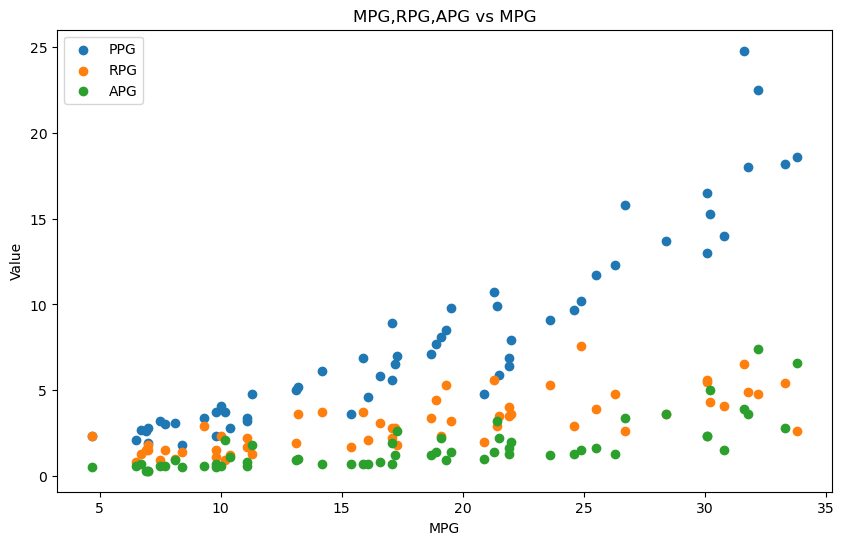

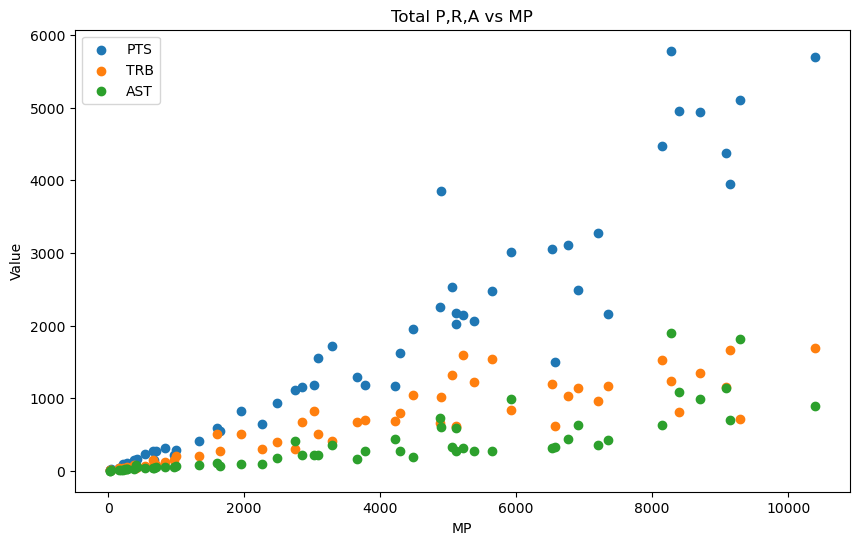

In [8]:
columns_plot_game = [10, 11, 12]
plt.figure(figsize=(10, 6))
for i in columns_plot_game:
    plt.scatter(df['MPG'], df.iloc[:, i], label=df.columns[i])
plt.title('MPG,RPG,APG vs MPG')
plt.xlabel('MPG')
plt.ylabel('Value')
plt.legend()
plt.show()

columns_plot_career = [3,4,5]
plt.figure(figsize=(10, 6))
for i in columns_plot_career:
    plt.scatter(df['MP'], df.iloc[:, i], label=df.columns[i])
plt.title('Total P,R,A vs MP')
plt.xlabel('MP')
plt.ylabel('Value')
plt.legend()
plt.show()

From these two plots, we can begin to draw conclusions. In the first plot, we observe that the points plot increase exponentially as their minutes are increased. However, we cannot say the same for assists and rebounds. The assists and rebounds exhibit a linear increase, but the slope is not very steep. Therefore, we can conclude that this class contains many scorers but not as many playmakers or rebounders. The second conclusion we can draw comes from the second plot. At the beginning of the plot, there is a cluster of dots, which becomes more spread out as the minutes progress. This indicates that several players were unable to surpass 1000 minutes played, likely due to being sent to the G-League or transferring to a different league. The third conclusion is that viewing both the average and total minutes played is beneficial. In the second plot, a player who has played around 5000 minutes has almost scored 4000 points. This player is Zion Williamson, who, despite enduring many injuries, remains an elite player. Although his minutes are limited, he still ranks among the top 10 scorers of his class. The averages fail to reflect his injuries and his remarkable performance in spite of them, while the second plot reveals his total minutes played and total points scored compared to other players.

<h3>Incorporating the Average NBA Player</h3>

In this upcoming section, I will be making an equation and then applying that equation to all of the 2019 NBA draft class in order to see if they are above or below the average NBA player. This will help me understand whether the NBA picks tend to be accurate or not.

In the code below, I created the equation to find the average 'points' of the NBA draft class. I used this equation to create a basic point system in which I can use for all players. By dividing by the minutes per game, I am making it a smaller number and also making it easier to compare the players. I did the same thing with all of the NBA players. The difference with the NBA average is that there are so many players on both sides of the spectrum, so it is hard to be sure whether this is the actual average or not.

In [9]:
avg_min = df['MPG'].mean()
avg_ppg = df['PPG'].mean()
avg_rpg = df['RPG'].mean()
avg_apg = df['APG'].mean()
avg = (2*avg_ppg + avg_rpg + avg_apg)/avg_min
avg_nba = 1.26
print('The 2019 NBA draft average is', avg)
print('The NBA average player has an average of', avg_nba)

The 2019 NBA draft average is 1.1366762177650425
The NBA average player has an average of 1.26


In the code below, I used 'for' loops to apply the equation to every single player in the dataset. I then applied an if-else statement which told me whether the player was above or below the average NBA player.

In [10]:
mpg_values = []
ppl_stats = []

for i in range(len(df)):
    row = df.iloc[i]
    ppl_stat = (2*row['PPG'] + row['RPG'] + row['APG']) / row['MPG']
    ppl_stat = ppl_stat.round(3)
    name = row['Player']
    print(name, 'has a score of',ppl_stat)
    
    if ppl_stat <= avg_nba:
        print(name, "is below the average player according to Ben Kim's formula.")
        print()
    else:
        print(name, "is above the average player according to Ben Kim's formula.")
        print()
    
    mpg_values.append(row['MPG'])
    ppl_stats.append(ppl_stat)

Zion Williamson has a score of 1.899
Zion Williamson is above the average player according to Ben Kim's formula.

Ja Morant has a score of 1.776
Ja Morant is above the average player according to Ben Kim's formula.

RJ Barrett has a score of 1.339
RJ Barrett is above the average player according to Ben Kim's formula.

De'Andre Hunter has a score of 1.091
De'Andre Hunter is below the average player according to Ben Kim's formula.

Darius Garland has a score of 1.373
Darius Garland is above the average player according to Ben Kim's formula.

Jarrett Culver has a score of 0.988
Jarrett Culver is below the average player according to Ben Kim's formula.

Coby White has a score of 1.218
Coby White is below the average player according to Ben Kim's formula.

Jaxson Hayes has a score of 1.145
Jaxson Hayes is below the average player according to Ben Kim's formula.

Rui Hachimura has a score of 1.167
Rui Hachimura is below the average player according to Ben Kim's formula.

Cam Reddish has a sc

Below I used a scatterplot to help visualize where the draft class stood compared to the average NBA player and also amongst their peers.

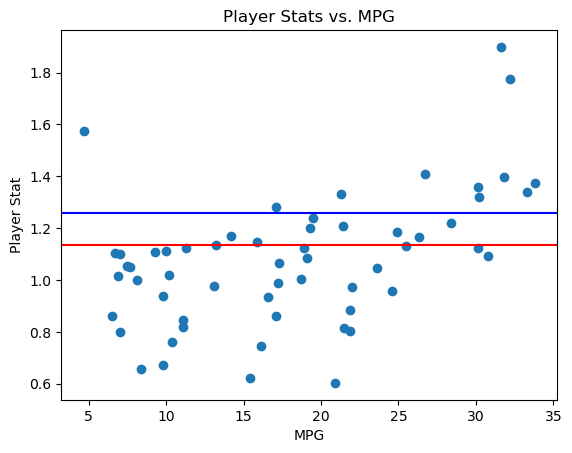

In [11]:
plt.scatter(mpg_values, ppl_stats)
plt.axhline(y=avg, color='r', linestyle='-', label='Average Line')
plt.axhline(y=avg_nba, color='b', linestyle='-', label='Average Line')
plt.xlabel('MPG')
plt.ylabel('Player Stat')
plt.title('Player Stats vs. MPG')
plt.show()

Below I found the mean for the top, middle, and bottom 10 picks of the 2019 draft class.

In [12]:
ppl_stats_top10_mean = np.mean(ppl_stats[:10])
ppl_stats_middle10_mean = np.mean(ppl_stats[25:35])
ppl_stats_low10_mean = np.mean(ppl_stats[-11:-1])

print(ppl_stats_top10_mean,
ppl_stats_middle10_mean,
ppl_stats_low10_mean)

1.2955 1.0477 0.9602999999999999


Below, I used a bar graph to help visualize where the averages stand compared to the NBA player average and to the 2019 draft class average.

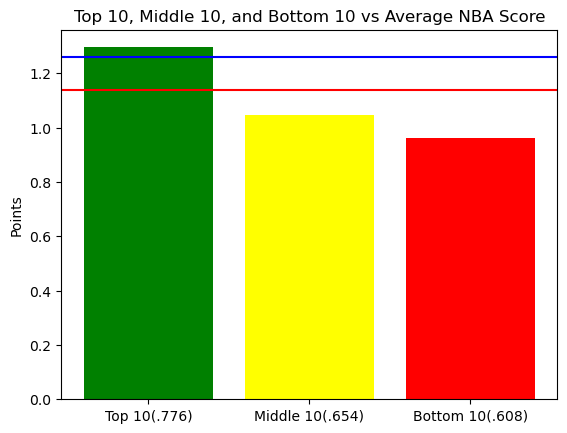

In [13]:
values = [ppl_stats_top10_mean,ppl_stats_middle10_mean,ppl_stats_low10_mean]
labels = ['Top 10(.776)', 'Middle 10(.654)','Bottom 10(.608)']
fig, ax = plt.subplots()
plt.axhline(y=avg, color='r', linestyle='-', label='Average Line')
plt.axhline(y=avg_nba, color='b', linestyle='-', label='Average Line')
ax.bar(labels, values, color=['green','yellow','red'])
plt.ylabel('Points')
plt.title('Top 10, Middle 10, and Bottom 10 vs Average NBA Score')
plt.show()

The first thing people might notice when looking at this graph is that it follows the shape of a negative exponential curve. This is because the quality of the players tends to decline after the top ten picks. Another observation is that the top ten picks are barely above the average NBA player. However, this is attributed to the fact that among the top ten picks, three players are considered busts. That is why I have created a bar graph below to represent all the players in the 2019 draft.

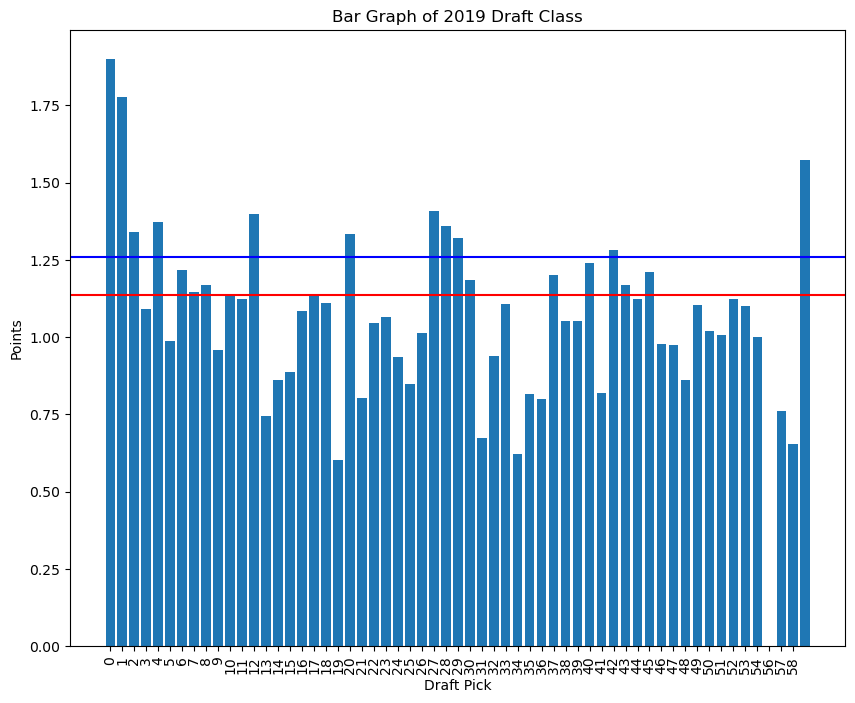

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(df.index, ppl_stats)
ax.set_xticks(range(len(df.index)))
ax.set_xticklabels(df.index, rotation=90)
plt.axhline(y=avg, color='r', linestyle='-', label='Average Line')
plt.axhline(y=avg_nba, color='b', linestyle='-', label='Average Line')
ax.set_xlabel('Draft Pick')
ax.set_ylabel('Points')
ax.set_title('Bar Graph of 2019 Draft Class')

plt.show()

An interesting outlier is observed in the final bar, representing a player with a minimal amount of playing time who nonetheless managed to contribute points, rebounds, and assists. This anomaly results in an exceptionally high points-to-minutes ratio, underscoring the complexity of evaluating draft success solely on traditional metrics.

<h3>Conclusion</h3>

Based on the data I have cleaned and analyzed, my conclusion is that NBA teams generally make sound draft choices, successfully selecting players who are well-suited to their team's needs and strategies. Despite the inevitable presence of both standout and less successful picks throughout the draft, it is evident that teams strive to draft the best possible player fit. This is particularly highlighted by the fact that the first two picks rank the highest in terms of points scored. Although there are variations, with some dips observed, these mostly occur later in the draft. It's worth noting that while several promising players emerge in the second round, the dataset at my disposal does not encapsulate the full spectrum of a player's contributions. This includes blocks, steals, and turnovers. NBA teams meticulously evaluate the entirety of a player's performance, considering more than just their offensive contributions, to ensure a comprehensive assessment of potential impact. Taking this into consideration, however, the majority of the picks end up being busts or subpar players rather than elite steals.